<span style="font-size: 36px;">Task 4.1</span>

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.spatial.distance import euclidean

customer_agg = pd.read_csv('C:/Users/User/Desktop/Week-2/notebooks/customer_aggregated_data.csv')

engagement_features = customer_agg[['TCP_retransmission', 'RTT', 'throughput']]

scaler = StandardScaler()
scaled_engagement_features = scaler.fit_transform(engagement_features)

kmeans_engagement = KMeans(n_clusters=3, random_state=42)
customer_agg['Engagement_Cluster'] = kmeans_engagement.fit_predict(scaled_engagement_features)

engagement_centroids = kmeans_engagement.cluster_centers_

engagement_centroids = scaler.inverse_transform(engagement_centroids)

engagement_centroids_df = pd.DataFrame(engagement_centroids, columns=['TCP_retransmission', 'RTT', 'throughput'])
engagement_centroids_df['cluster_id'] = range(len(engagement_centroids))
engagement_centroids_df.to_csv('engagement_clusters.csv', index=False)


In [15]:
experience_features = customer_agg[['TCP_retransmission', 'RTT', 'throughput']]

scaled_experience_features = scaler.transform(experience_features)

kmeans_experience = KMeans(n_clusters=3, random_state=42)
customer_agg['Experience_Cluster'] = kmeans_experience.fit_predict(scaled_experience_features)

experience_centroids = kmeans_experience.cluster_centers_

experience_centroids = scaler.inverse_transform(experience_centroids)

experience_centroids_df = pd.DataFrame(experience_centroids, columns=['TCP_retransmission', 'RTT', 'throughput'])
experience_centroids_df['cluster_id'] = range(len(experience_centroids))
experience_centroids_df.to_csv('experience_clusters.csv', index=False)


In [16]:
engagement_centroids = pd.read_csv('engagement_clusters.csv')
experience_centroids = pd.read_csv('experience_clusters.csv')

less_engaged_cluster = 0  # Example cluster ID, replace with actual ID
worst_experience_cluster = 2  # Example cluster ID, replace with actual ID

less_engaged_centroid = engagement_centroids.loc[engagement_centroids['cluster_id'] == less_engaged_cluster].drop(columns='cluster_id').values.flatten()
worst_experience_centroid = experience_centroids.loc[experience_centroids['cluster_id'] == worst_experience_cluster].drop(columns='cluster_id').values.flatten()

def calculate_score(row, centroid):
    return euclidean(row, centroid)

customer_agg['engagement_score'] = customer_agg[['TCP_retransmission', 'RTT', 'throughput']].apply(lambda row: calculate_score(row, less_engaged_centroid), axis=1)
customer_agg['experience_score'] = customer_agg[['TCP_retransmission', 'RTT', 'throughput']].apply(lambda row: calculate_score(row, worst_experience_centroid), axis=1)

customer_agg['satisfaction_score'] = (customer_agg['engagement_score'] + customer_agg['experience_score']) / 2

print(customer_agg[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']])



        MSISDN/Number  engagement_score  experience_score  satisfaction_score
0        3.360100e+10      6.150567e+06      7.272307e+06        6.711437e+06
1        3.360100e+10      6.150567e+06      7.272307e+06        6.711437e+06
2        3.360100e+10      6.150567e+06      7.272307e+06        6.711437e+06
3        3.360101e+10      4.253860e+06      3.132209e+06        3.693035e+06
4        3.360101e+10      3.100898e+06      4.222598e+06        3.661748e+06
...               ...               ...               ...                 ...
106851   3.379000e+10      4.525198e+06      3.403518e+06        3.964358e+06
106852   3.379000e+10      6.150567e+06      7.272307e+06        6.711437e+06
106853   3.197021e+12      6.150567e+06      7.272307e+06        6.711437e+06
106854   3.370000e+14      6.150567e+06      7.272307e+06        6.711437e+06
106855   8.823971e+14      6.150567e+06      7.272307e+06        6.711437e+06

[106856 rows x 4 columns]


<span style="font-size: 36px;">Task 4.2</span>

In [30]:
user_scores = pd.read_csv('C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source_cleaned.csv')

user_scores['engagement_score'] = (user_scores['social_media_dl_(bytes)'] + 
                                    user_scores['google_dl_(bytes)'] + 
                                    user_scores['email_dl_(bytes)'] + 
                                    user_scores['youtube_dl_(bytes)'] + 
                                    user_scores['netflix_dl_(bytes)'] + 
                                    user_scores['gaming_dl_(bytes)'] + 
                                    user_scores['other_dl_(bytes)'])

user_scores['experience_score'] = (user_scores['avg_bearer_tp_dl_(kbps)'] - 
                                    user_scores['avg_rtt_dl_(ms)'])  # Simple example

user_scores['satisfaction_score'] = (user_scores['engagement_score'] + user_scores['experience_score']) / 2

top_10_satisfied = user_scores.nlargest(10, 'satisfaction_score')

print(top_10_satisfied[['bearer_id', 'satisfaction_score']])


          bearer_id  satisfaction_score
3484   7.277826e+18         860409912.5
13330  7.277826e+18         858767523.5
1088   1.304243e+19         856044013.5
290    1.304243e+19         854750593.5
3731   1.304243e+19         852049470.0
10207  1.304243e+19         851051619.5
9499   1.304243e+19         848894767.0
12304  7.277826e+18         844423219.0
11097  1.304243e+19         844046078.0
4778   1.304243e+19         843055114.0


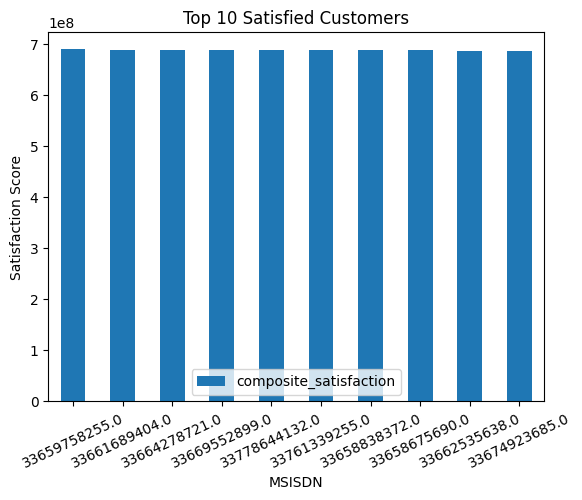

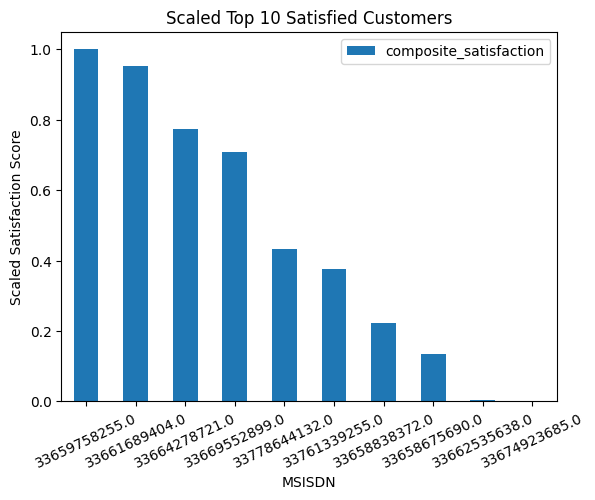

In [43]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

if 'composite_satisfaction' in user_scores.columns:

    def normalizer(df, columns):
        norm = Normalizer()
        return pd.DataFrame(norm.fit_transform(df), columns=columns)

    def scaler(df, columns):
        minmax_scaler = MinMaxScaler()
        return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

    def scale_and_normalize(df, columns):
        return normalizer(scaler(df, columns), columns)

    # Get top 10 satisfied customers
    top_10_satisfied = user_scores.sort_values(by=['composite_satisfaction'], ascending=False).head(10)

    # Scale the satisfaction scores
    scaled_top_score = scaler(top_10_satisfied[['composite_satisfaction']], ['composite_satisfaction'])
    scaled_top_score['msisdn'] = top_10_satisfied['msisdn/number'].to_list()  # Correct column name

    # Plot the original and scaled satisfaction scores
    top_10_satisfied.plot(kind="bar", x='msisdn/number', y='composite_satisfaction', rot=25, title='Top 10 Satisfied Customers')
    plt.xlabel('MSISDN')
    plt.ylabel('Satisfaction Score')
    plt.show()

    scaled_top_score.plot(kind="bar", x='msisdn', y='composite_satisfaction', rot=25, title='Scaled Top 10 Satisfied Customers')
    plt.xlabel('MSISDN')
    plt.ylabel('Scaled Satisfaction Score')
    plt.show()

else:
    print("Column 'composite_satisfaction' not found in the DataFrame. Please check the column names.")


<span style="font-size: 36px;">Task 4.3</span>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = user_scores[['social_media_dl_(bytes)', 'google_dl_(bytes)']]  
y = user_scores[['composite_satisfaction']]  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

all_predictions = linear_reg.predict(X)

user_scores['predicted_composite_satisfaction'] = all_predictions


Mean Squared Error: 3.870107846534315e+16
